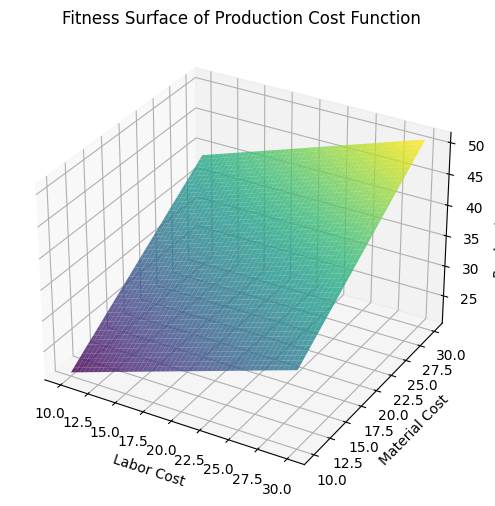

Best Solution (Labor Cost, Material Cost, Energy Cost): [11.58512429 16.28330125 20.38934613]
Best Production Cost: 27.722849536853577


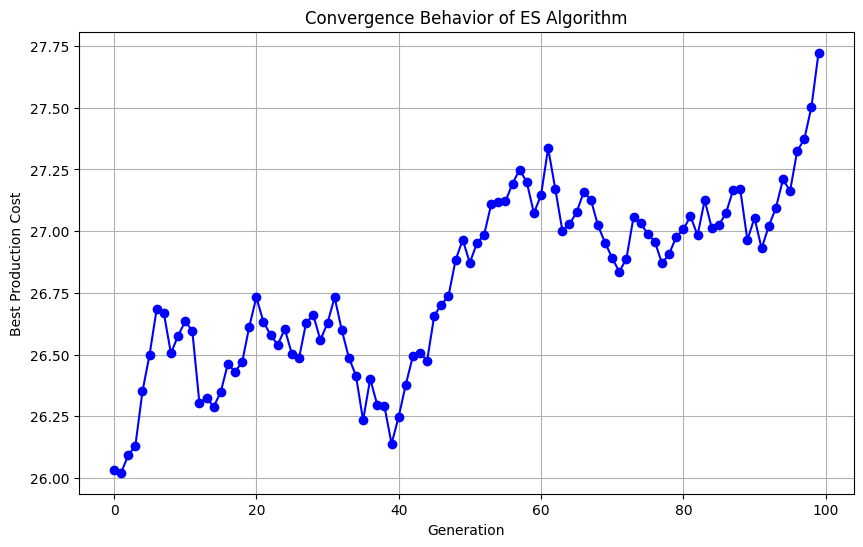

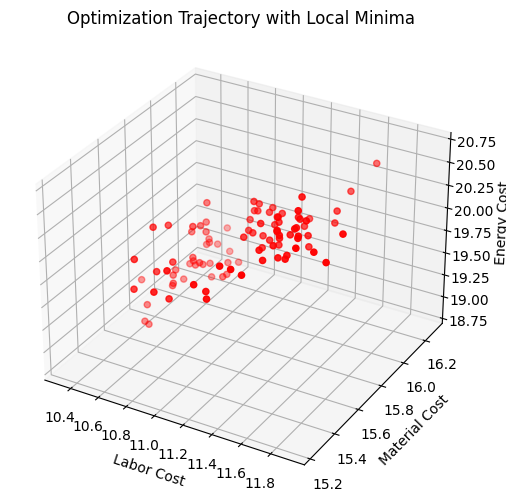

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def production_cost(x):
    """
    Calculates the total production cost based on labor, material, energy, and quality control factors.

    Args:
    - x (array): Array of production cost factors representing labor, material, and energy costs.

    Returns:
    - float: Total production cost.
    """
    labor_cost = 0.5 * x[0]  # labor cost factor
    material_cost = 0.8 * x[1]  # raw material cost factor
    energy_cost = 0.3 * x[2]  # energy consumption factor
    quality_cost = 0.2 * (x[0] + x[1]) / 2  # quality control cost factor
    total_cost = labor_cost + material_cost + energy_cost + quality_cost
    return total_cost

def run_ES(num_generations):
    """
    Runs the Evolution Strategies (ES) algorithm to minimize the production cost.

    Args:
    - num_generations (int): Number of generations for the ES algorithm.

    Returns:
    - tuple: Best solution, best fitness, fitness history, and solutions history.
    """
    mu = 5  # Number of parents
    lambda_ = 20  # Total population size
    mutation_step_size = 0.1
    num_dimensions = 3  # Number of dimensions for production cost factors
    search_space = (10, 30)  # Bounds for production cost factors

    # Initialization
    parents = np.random.uniform(low=search_space[0], high=search_space[1], size=(mu, num_dimensions))
    fitness_history = []
    solutions_history = []

    # Iterative evolution
    for generation in range(num_generations):
        # Mutation
        offspring = parents + np.random.normal(scale=mutation_step_size, size=parents.shape)

        # Evaluate fitness
        fitness_values = np.array([production_cost(x) for x in offspring])
        best_index = np.argmin(fitness_values)
        best_fitness = fitness_values[best_index]
        best_solution = offspring[best_index]
        fitness_history.append(best_fitness)
        solutions_history.append(best_solution)

        # Selection
        sorted_indices = np.argsort(fitness_values)
        parents = offspring[sorted_indices[:mu]]

    # Select the best individual
    best_solution = parents[0]
    best_fitness = production_cost(best_solution)

    return best_solution, best_fitness, fitness_history, solutions_history

def plot_fitness_surface():
    """
    Plots the fitness surface of the production cost function.
    """
    labor_range = np.linspace(10, 30, 50)
    material_range = np.linspace(10, 30, 50)
    labor, material = np.meshgrid(labor_range, material_range)
    energy = 20  # Fixed energy cost for visualization
    cost = production_cost([labor, material, energy])

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(labor, material, cost, cmap='viridis', alpha=0.8)
    ax.set_xlabel('Labor Cost')
    ax.set_ylabel('Material Cost')
    ax.set_zlabel('Production Cost')
    ax.set_title('Fitness Surface of Production Cost Function')
    plt.show()

def visualize_local_minima(solutions_history):
    """
    Visualizes the location of local minima found during optimization.

    Args:
    - solutions_history (array): Array containing solutions visited during optimization.
    """
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(solutions_history[:, 0], solutions_history[:, 1], solutions_history[:, 2], c='r', marker='o')
    ax.set_xlabel('Labor Cost')
    ax.set_ylabel('Material Cost')
    ax.set_zlabel('Energy Cost')
    ax.set_title('Optimization Trajectory with Local Minima')
    plt.show()

# Experiment setup
num_generations = 100

# Plot fitness surface
plot_fitness_surface()

# Run ES algorithm
best_solution, best_fitness, fitness_history, solutions_history = run_ES(num_generations)

# Analyze optimization results
print("Best Solution (Labor Cost, Material Cost, Energy Cost):", best_solution)
print("Best Production Cost:", best_fitness)

# Convergence behavior
plt.figure(figsize=(10, 6))
plt.plot(fitness_history, marker='o', linestyle='-', color='b')
plt.xlabel("Generation")
plt.ylabel("Best Production Cost")
plt.title("Convergence Behavior of ES Algorithm")
plt.grid(True)
plt.show()

# Visualize optimization trajectory
visualize_local_minima(np.array(solutions_history))
